# Load the important dependencies

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [28]:
df = pd.read_csv("Raw_data/stablecoins_data.csv")
df.head()

,ID,Symbol,Name,Current Price (USD),Market Cap (USD),Total Volume (USD),High 24h (USD),Low 24h (USD),Price Change % (24h),Last Updated
0,tether,usdt,Tether,0.998814,142024155740,9.854325e+10,0.999409,0.998400,-0.01622,2025-02-28T06:06:34.622Z
1,usd-coin,usdc,USDC,0.999871,55515149694,1.456540e+10,0.999997,0.999711,-0.00330,2025-02-28T06:06:35.634Z
2,usds,usds,USDS,0.999150,7717898528,3.845377e+07,1.002000,0.996767,-0.09714,2025-02-28T06:06:33.641Z
3,ethena-usde,usde,Ethena USDe,0.999157,5854970507,7.250980e+07,1.001000,0.997322,0.00964,2025-02-28T06:06:34.688Z
4,dai,dai,Dai,0.999481,3302321686,2.225301e+08,1.002000,0.998885,-0.06216,2025-02-28T06:06:35.286Z


# Data Cleaning

In [29]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Convert 'Last Updated' to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Check data types
print(df.dtypes)

ID                      0
Symbol                  0
Name                    0
Current Price (USD)     0
Market Cap (USD)        0
Total Volume (USD)      0
High 24h (USD)          4
Low 24h (USD)           4
Price Change % (24h)    4
Last Updated            0
dtype: int64
Number of duplicates: 0
ID                                   object
Symbol                               object
Name                                 object
Current Price (USD)                 float64
Market Cap (USD)                      int64
Total Volume (USD)                  float64
High 24h (USD)                      float64
Low 24h (USD)                       float64
Price Change % (24h)                float64
Last Updated            datetime64[ns, UTC]
dtype: object


# Summary Statistics

In [30]:
# Summary statistics for numerical columns
print(df.describe())

       Current Price (USD)  Market Cap (USD)  Total Volume (USD)  \
count            96.000000      9.600000e+01        9.600000e+01   
mean             90.301796      2.406204e+09        1.281891e+09   
std             500.135065      1.549877e+10        1.018034e+10   
min               0.000060      4.324921e+06        0.000000e+00   
25%               0.996114      1.548069e+07        1.191338e+05   
50%               0.999389      4.813125e+07        1.090434e+06   
75%               1.003500      2.124306e+08        1.091796e+07   
max            2866.080000      1.420242e+11        9.854325e+10   

       High 24h (USD)  Low 24h (USD)  Price Change % (24h)  
count       96.000000      96.000000             96.000000  
mean        91.940904      90.147933             -0.447485  
std        509.275872     499.316969              1.866148  
min          0.000062       0.000060            -11.394750  
25%          0.999132       0.987901             -0.237118  
50%          1.001000

# Price Distribution

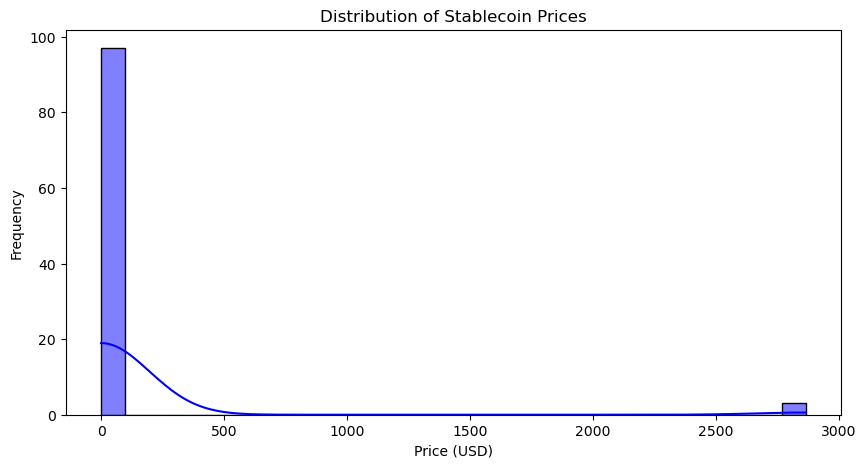

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Raw_data/stablecoins_data.csv")

# Convert columns to numeric where necessary
df["Current Price (USD)"] = pd.to_numeric(df["Current Price (USD)"], errors="coerce")

# Plot price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Current Price (USD)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Stablecoin Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


# Market Cap vs. Trading Volume (Bubble Chart)

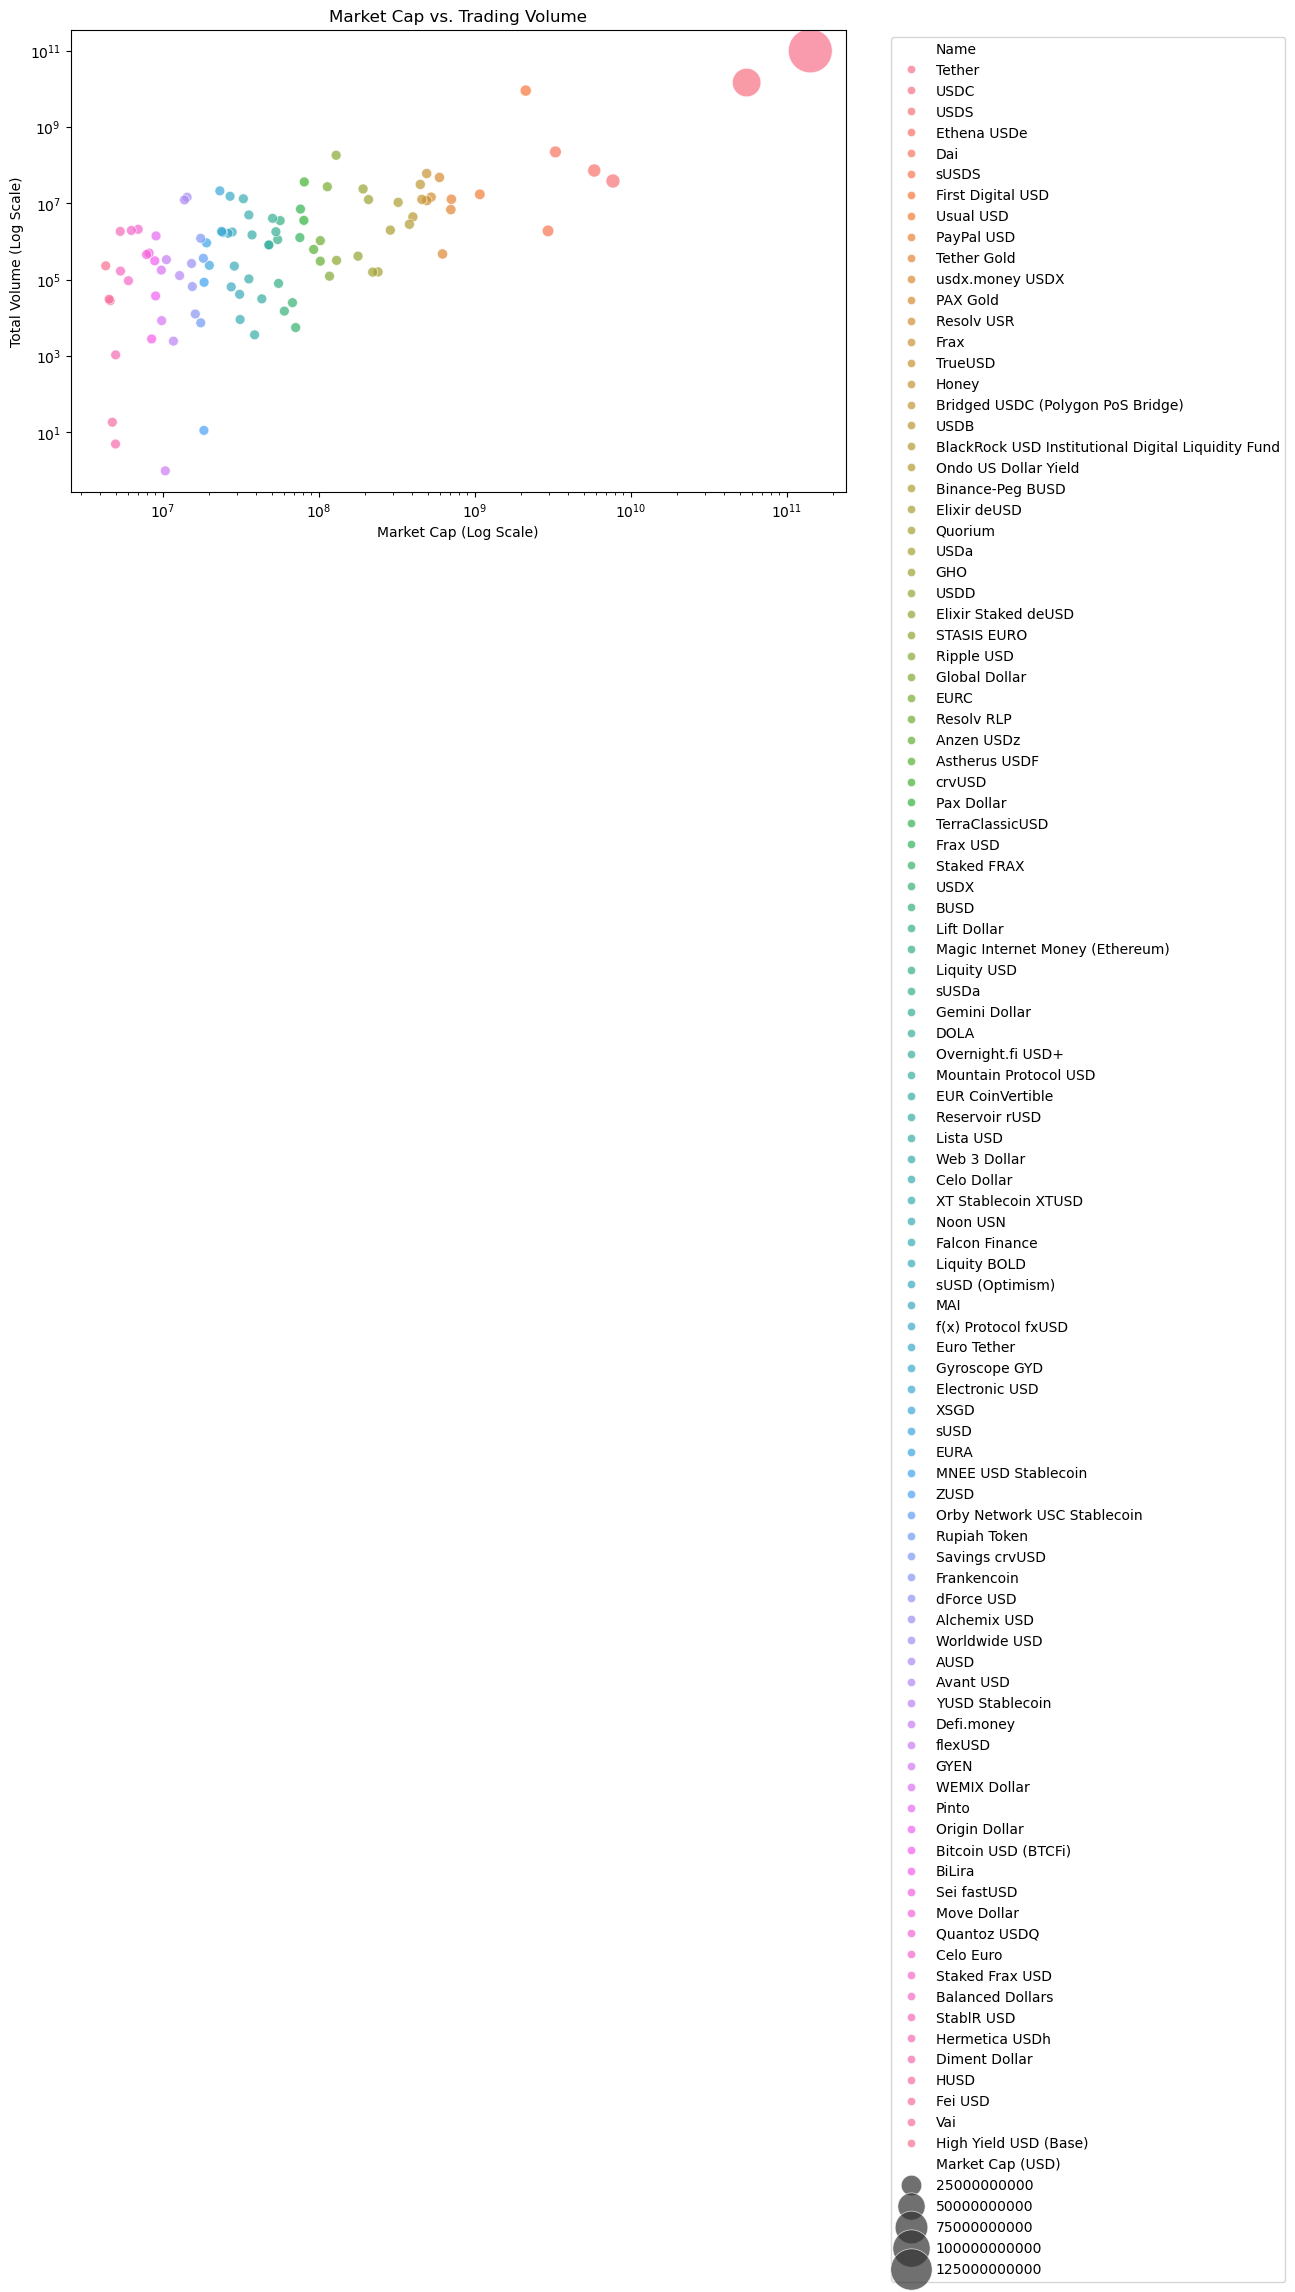

In [32]:
df["Market Cap (USD)"] = pd.to_numeric(df["Market Cap (USD)"], errors="coerce")
df["Total Volume (USD)"] = pd.to_numeric(df["Total Volume (USD)"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Market Cap (USD)"], y=df["Total Volume (USD)"], size=df["Market Cap (USD)"], hue=df["Name"], sizes=(50, 1000), alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.title("Market Cap vs. Trading Volume")
plt.xlabel("Market Cap (Log Scale)")
plt.ylabel("Total Volume (Log Scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Top 10 Stablecoins by Market Cap (Bar Chart)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7940\3372805797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10["Name"], x=top_10["Market Cap (USD)"], palette="viridis")


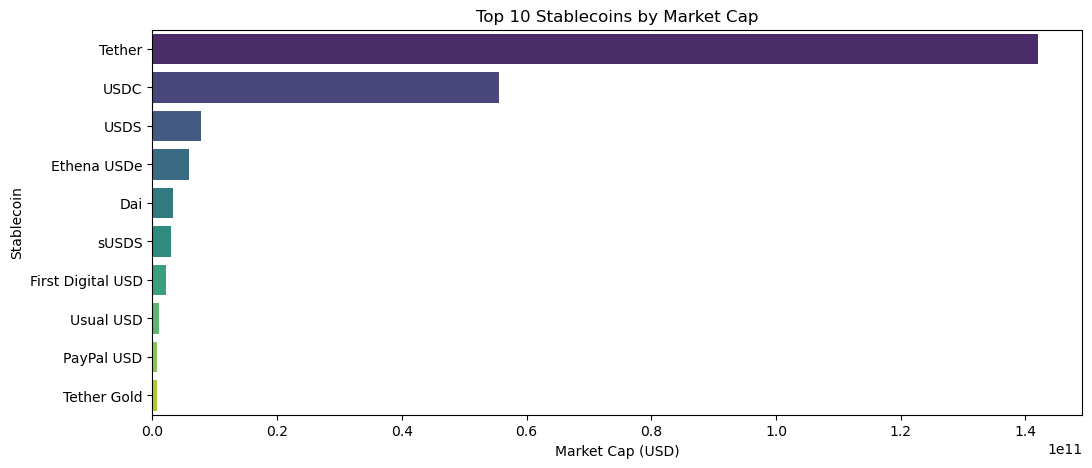

In [33]:
top_10 = df.nlargest(10, "Market Cap (USD)")

plt.figure(figsize=(12, 5))
sns.barplot(y=top_10["Name"], x=top_10["Market Cap (USD)"], palette="viridis")
plt.title("Top 10 Stablecoins by Market Cap")
plt.xlabel("Market Cap (USD)")
plt.ylabel("Stablecoin")
plt.show()


# Distribution of Numerical Features

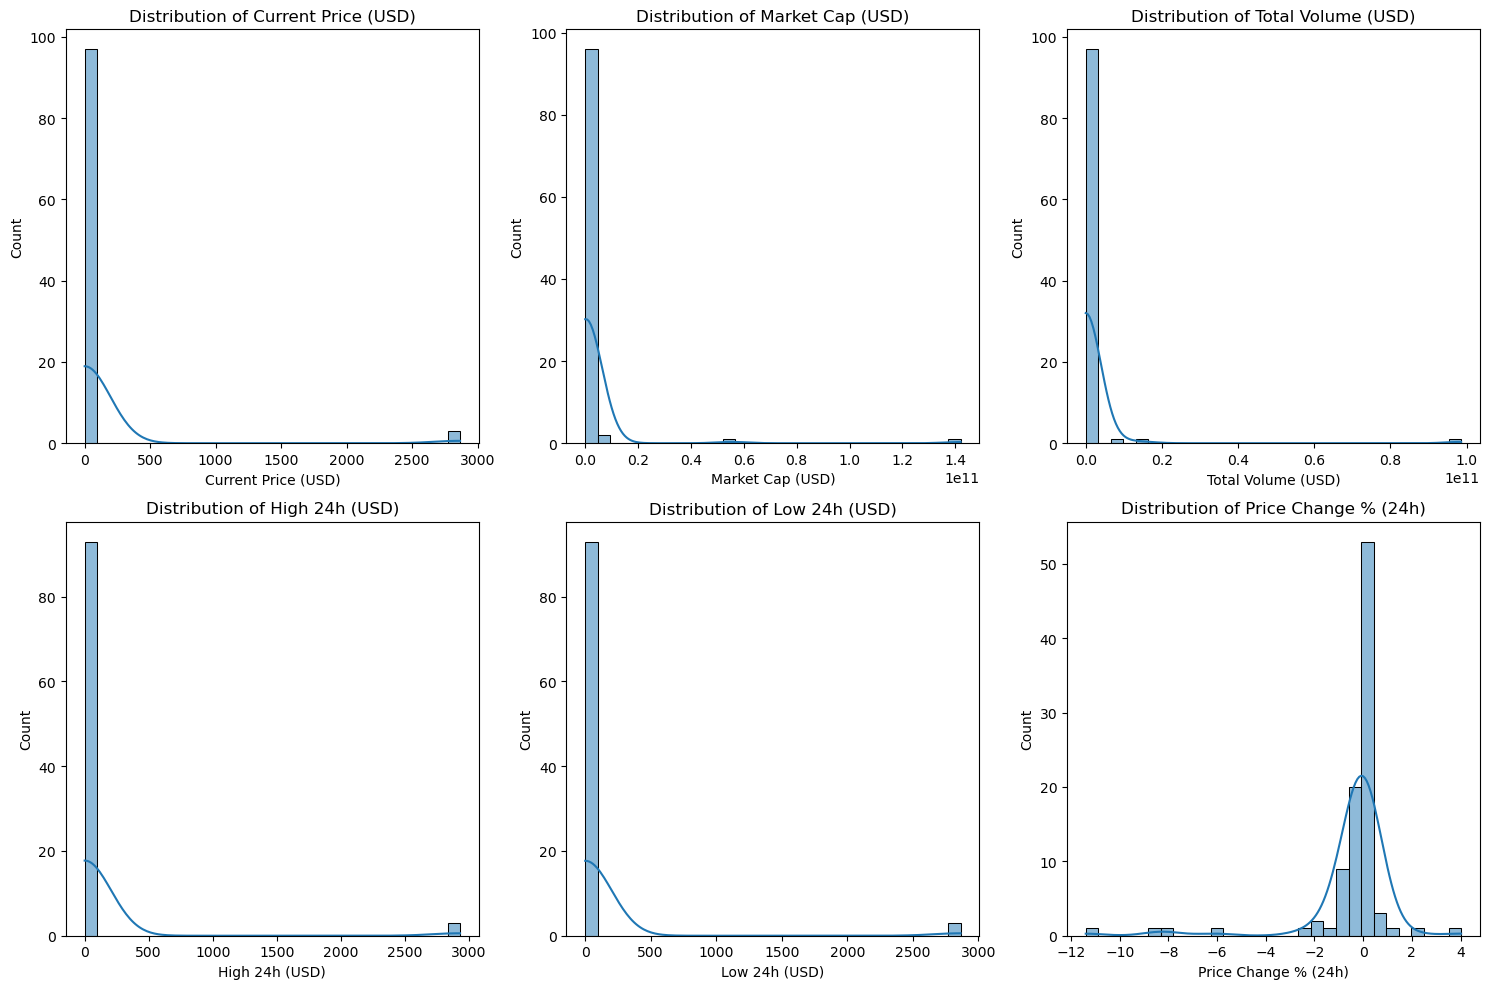

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for numerical columns
numerical_columns = ['Current Price (USD)', 'Market Cap (USD)', 'Total Volume (USD)', 
                     'High 24h (USD)', 'Low 24h (USD)', 'Price Change % (24h)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Feature Extraction

In [35]:
# Calculate price stability (difference between high and low prices)
df['Price Stability'] = df['High 24h (USD)'] - df['Low 24h (USD)']
# Market Cap to Volume Ratio
df['Market Cap to Volume Ratio'] = df['Market Cap (USD)'] / df['Total Volume (USD)']
# Categorize price change into 'Increase', 'Decrease', or 'Stable'
df['Price Change Category'] = pd.cut(df['Price Change % (24h)'],
                                     bins=[-float('inf'), -0.01, 0.01, float('inf')],
                                     labels=['Decrease', 'Stable', 'Increase'])

# Price Stability vs Market cap

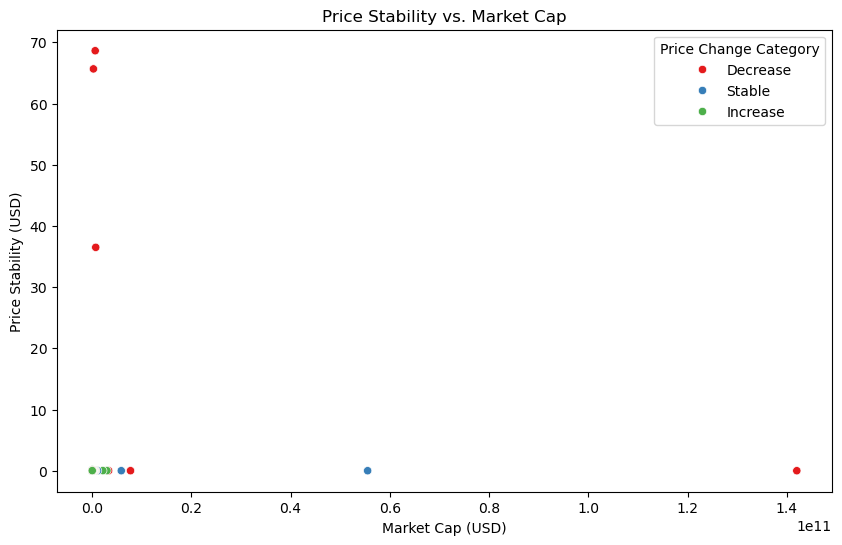

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Cap (USD)', y='Price Stability', data=df, hue='Price Change Category', palette='Set1')
plt.title('Price Stability vs. Market Cap')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Price Stability (USD)')
plt.show()

# Market Cap to Volume Ratio

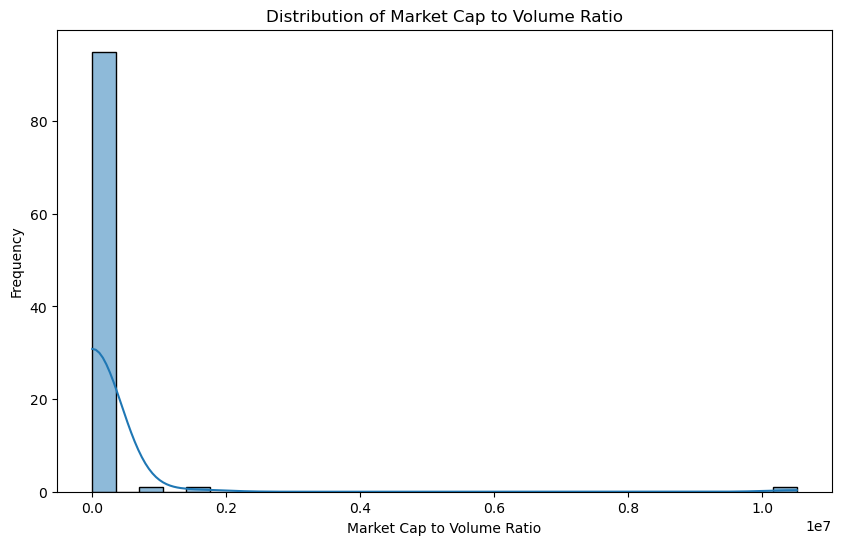

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Market Cap to Volume Ratio'], kde=True, bins=30)
plt.title('Distribution of Market Cap to Volume Ratio')
plt.xlabel('Market Cap to Volume Ratio')
plt.ylabel('Frequency')
plt.show()

# Market dominance of each stable coin

In [38]:
total_market_cap = df['Market Cap (USD)'].sum()
df['Market Dominance (%)'] = (df['Market Cap (USD)'] / total_market_cap) * 100

# Volume to market-cap ratio

In [39]:
df['Volume to Market Cap Ratio'] = df['Total Volume (USD)'] / df['Market Cap (USD)']

# Violin Plot: Price Change % by Category

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7940\1879036628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Price Change Category', y='Price Change % (24h)', data=df, palette='Set2')


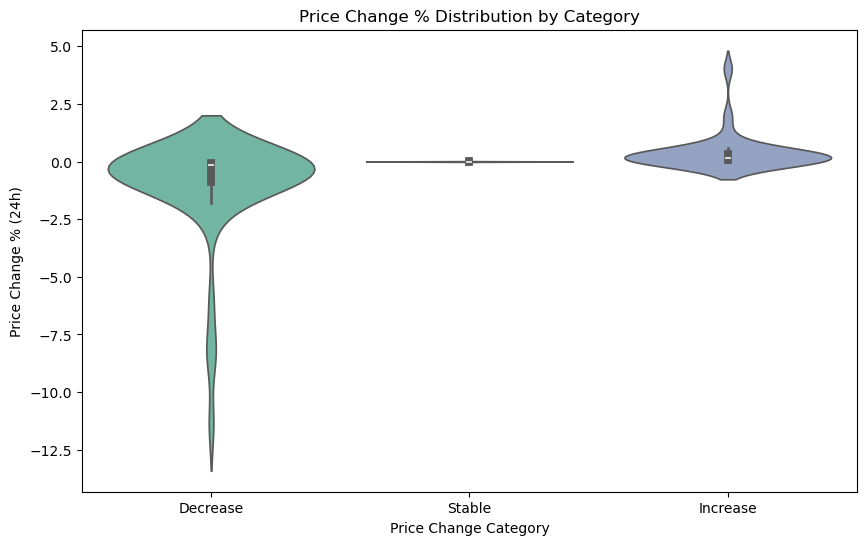

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Price Change Category', y='Price Change % (24h)', data=df, palette='Set2')
plt.title('Price Change % Distribution by Category')
plt.xlabel('Price Change Category')
plt.ylabel('Price Change % (24h)')
plt.show()

# Correlation heatmap 

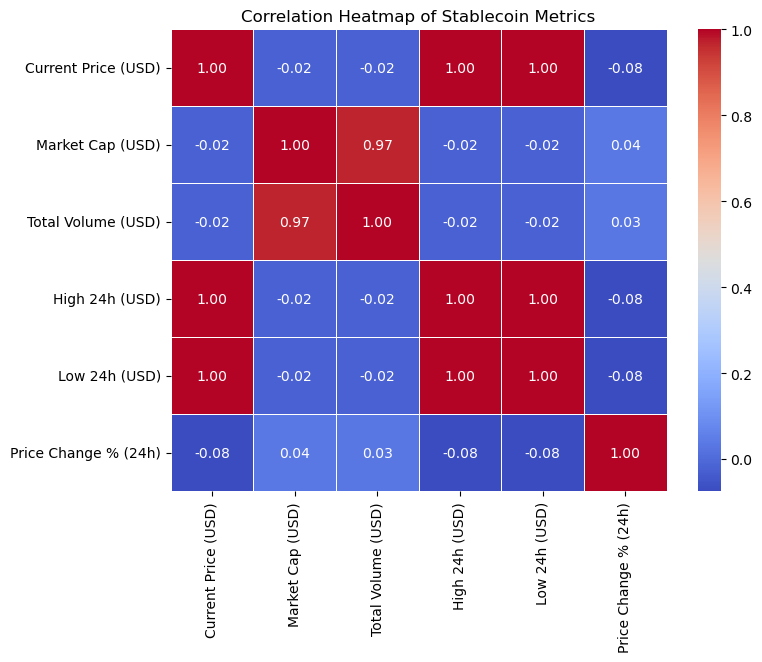

In [41]:
import numpy as np

# Convert all numeric columns
numeric_cols = ["Current Price (USD)", "Market Cap (USD)", "Total Volume (USD)", "High 24h (USD)", "Low 24h (USD)", "Price Change % (24h)"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stablecoin Metrics")
plt.show()


In [42]:
# Save to a new CSV file
df.to_csv("final_stablecoins_data.csv", index=False)
print("Final dataset saved to 'final_stablecoins_data.csv'")

Final dataset saved to 'final_stablecoins_data.csv'
